# Test Trotterization on FakeJakarta with QREM

- Status: OK

# Import Libiraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
plt.rcParams.update({'font.size': 16})  # enlarge matplotlib fonts

In [2]:
# Import qubit states Zero (|0>) and One (|1>), and Pauli operators (X, Y, Z)
from qiskit.opflow import Zero, One, I, X, Y, Z
from qiskit import QuantumCircuit, QuantumRegister, IBMQ, execute, transpile, Aer
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor
from qiskit.circuit import Parameter
from qiskit.transpiler.passes import RemoveBarriers
backend = Aer.get_backend("qasm_simulator")

# Initial State Function

In [3]:
def make_initial_state(qc, initial_state):
    """
    logical qubit index
    little endian
    """
    for i, state in enumerate(initial_state):
        if state == "1":
            qc.x(i)

# エンコーダとデコーダ

論理|q_0, q_1, q_2>を、論理|q_1, q_2>にエンコード

エンコードするときに、q_0が1を保っていれば、デコードの際にcnotが1個減らせる？？→嘘

In [4]:
def subspace_encoder(qc, targets):
    """
    naive method, can be optimized for init state |110>
    little endian
    """
    n = qc.num_qubits
    qc.cx(targets[0],targets[1])
    qc.cx(targets[2],targets[1])
    qc.cx(targets[1],targets[2])
    qc.cx(targets[0],targets[1])
    qc.cx(targets[1],targets[0])

In [5]:
def subspace_encoder_init110(qc, targets):
    """
    optimized encoder for init state |110>
    endian: |q_0, q_1, q_2> (little endian)
    encode |110> to |0>|10>
    """
    n = qc.num_qubits
    qc.x(targets[0])

In [6]:
def subspace_decoder(qc, targets):
    """
    naive method
    little endian
    """
    n = qc.num_qubits
    qc.cx(targets[1],targets[0])
    qc.cx(targets[0],targets[1])
    qc.cx(targets[1],targets[2])
    qc.cx(targets[2],targets[1])
    qc.cx(targets[0],targets[1])

In [7]:
# Combine subcircuits into a single multiqubit gate representing a single trotter step
num_qubits = 3

# initial layout
initial_layout = [5,3,1]

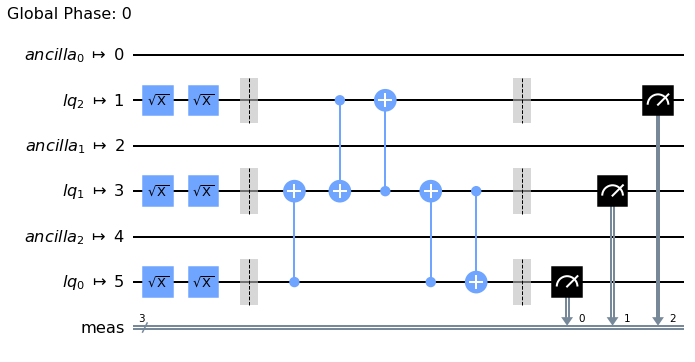

In [18]:
qr = QuantumRegister(num_qubits, name="lq")
qc = QuantumCircuit(qr)
qc.x([1])
qc.barrier()
subspace_encoder(qc, targets=[0, 1, 2]) # encode
qc.measure_all()
t3_qc = transpile(qc, optimization_level=3, basis_gates=["sx", "cx", "rz"], initial_layout=initial_layout)
t3_qc.draw("mpl")

In [19]:
execute(qc, backend).result().get_counts()

{'001': 1024}